In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[1,1,],[0,0]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
#print(y)

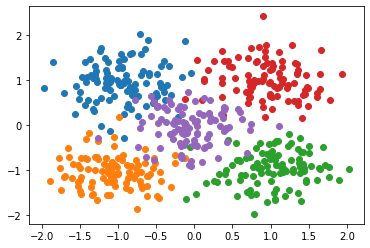

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [5]:
y_cat = to_categorical(y,5)
y_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [6]:
model = Sequential()
model.add(Dense(units=5,input_shape=(2,),activation='softmax'))
model.compile(Adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
h = model.fit(X,y_cat,verbose=1,batch_size=50,epochs=300)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/300





500/500 [==============================] - 0s 347us/step - loss: 1.4587 - acc: 0.3360
Epoch 2/300
500/500 [==============================] - 0s 37us/step - loss: 1.3268 - acc: 0.3420
Epoch 3/300
500/500 [==============================] - 0s 35us/step - loss: 1.2135 - acc: 0.3920
Epoch 4/300
500/500 [==============================] - 0s 29us/step - loss: 1.1109 - acc: 0.5060
Epoch 5/300
500/500 [==============================] - 0s 28us/step - loss: 1.0223 - acc: 0.6160
Epoch 6/300
500/500 [==============================] - 0s 34us/step - loss: 0.9491 - acc: 0.6740
Epoch 7/300
500/500 [==============================] - 0s 36us/step - loss: 0.8851 - acc: 0.7020
Epoch 8/300
500/500 [==============================] - 0s 32us/step - loss: 0.8288 - acc: 0.7500
Epoch 9/300
500/500 [==============================] - 0s 30us/step - loss: 0.7814 - acc: 0.7840
Epoch 10/300
500/500 [==

Text(0.5, 1.0, 'accuracy')

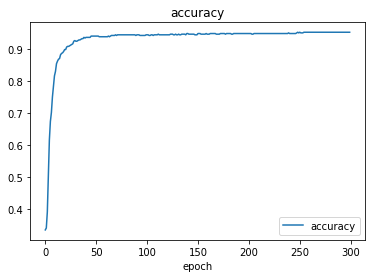

In [8]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

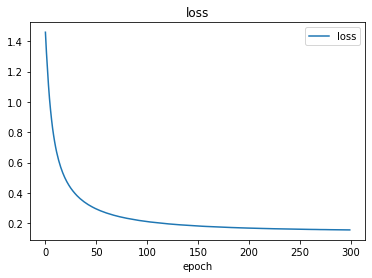

In [9]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [0]:
def plot_decision_boundary(X,y, model):
      x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
      y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
      xx,yy = np.meshgrid(x_span,y_span)
      xx_,yy_ = xx.ravel(),yy.ravel()
      grid = np.c_[xx_,yy_]
      pred_func = model.predict_classes(grid)
      z = pred_func.reshape(xx.shape)
      plt.contourf(xx,yy,z)
      plt.scatter(X[:n_pts,0], X[:n_pts,1])
      plt.scatter(X[n_pts:,0], X[n_pts:,1])

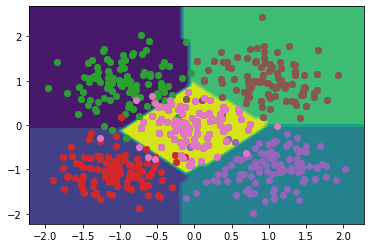

In [11]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

[3]


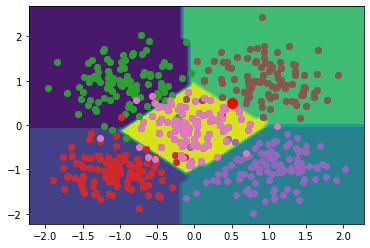

In [12]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
x = 0.5
y = 0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker='o', markersize=10, color="red")
print(prediction)

[3]


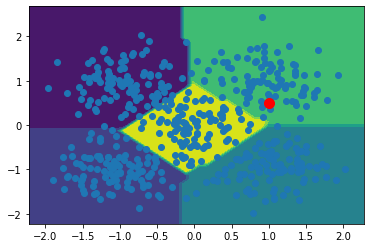

In [13]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
x = 1
y = 0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker='o', markersize=10, color="red")
print(prediction)

[1]


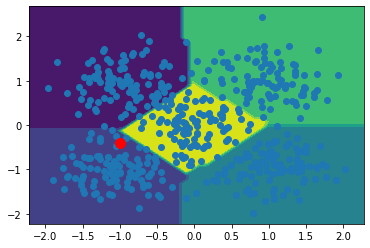

In [14]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
x = -1
y = -0.4
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker='o', markersize=10, color="red")
print(prediction)